# 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기
### https://github.com/ndb796/CNN-based-Celebrity-Classification-AI-Service-Using-Transfer-Learning

1. 이미지 크롤링을 활용한 학습 이미지 수집
2. PyTorch를 이용한 전이 학습(Transfer Learning)
3. 분류 모델 API 개발

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/Users/ryuserin/Library/Fonts/NanumSquare_acL.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumSquare_ac')
matplotlib.font_manager._rebuild()

In [2]:
!git clone https://github.com/ndb796/bing_image_downloader

fatal: 대상 경로가('bing_image_downloader') 이미 있고 빈 디렉터리가 아닙니다.


## 1. 이미지 크롤링을 활용한 학습 이미지 수집

In [3]:
import os
import shutil #파이썬 파일 복사 모듈
from bing_image_downloader.bing_image_downloader import downloader

# 초기 디렉토리 만들기 (수집한 이미지를 저장하기 위한 폴더)
directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수 정의
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [4]:
#마동석 이미지 크롤링을 진행하고 데이터셋을 구축합니다.
query = '마동석'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg)
[Error] Invalid image, not saving https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg
[Info] Issue getting: https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg
[Error] No active exception to reraise
#1 이미지 다운로드 (http://tenasia.hankyung.com/webwp_kr/wp-content/uploads/2019/05/2019052107335591284-540x786.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://cdn.fanzeel.com/rep/302/5dde32f28e97c.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99A1D03A5C1B540F37)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99A1D03A5C1B540F37
[Error] HTTP Error 403: Forbidden
#3 이미지 다운로드 (https://image.chosun.com/sitedata/im

#39 파일 다운로드가 완료되었습니다.
#40 이미지 다운로드 (https://image.ytn.co.kr/general/jpg/2019/1112/201911120918554289_t.jpg)
#40 파일 다운로드가 완료되었습니다.
[Info] Done. Downloaded 40 images.
[Train Dataset] image_15.jpg
[Train Dataset] image_29.jpg
[Train Dataset] image_28.jpg
[Train Dataset] image_14.jpg
[Train Dataset] image_16.jpg
[Train Dataset] image_17.jpg
[Train Dataset] image_13.jpg
[Train Dataset] image_12.jpg
[Train Dataset] image_38.jpg
[Train Dataset] image_10.jpg
[Train Dataset] image_11.jpg
[Train Dataset] image_39.jpeg
[Train Dataset] image_9.jpg
[Train Dataset] image_19.jpeg
[Train Dataset] image_2.jpg
[Train Dataset] image_3.jpg
[Train Dataset] image_40.jpg
[Train Dataset] image_1.jpg
[Train Dataset] image_4.jpg
[Train Dataset] image_5.jpg
[Train Dataset] image_7.jpg
[Train Dataset] image_6.jpg
[Train Dataset] image_34.jpg
[Train Dataset] image_20.jpg
[Train Dataset] image_21.jpg
[Train Dataset] image_35.jpg
[Train Dataset] image_8.jpeg
[Train Dataset] image_23.jpg
[Train Dataset] image_37.jpg


In [5]:
#김종국 이미지 크롤링을 진행하고 데이터셋을 구축합니다.
query = '김종국'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://img.hankyung.com/photo/201907/BF.20024514.1.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://images.mir.pe/file/6d977cd5e5ff7d4e5d000b6ade29bb8c)
[Error] Invalid image, not saving https://images.mir.pe/file/6d977cd5e5ff7d4e5d000b6ade29bb8c
[Info] Issue getting: https://images.mir.pe/file/6d977cd5e5ff7d4e5d000b6ade29bb8c
[Error] No active exception to reraise
#2 이미지 다운로드 (https://image.chosun.com/sitedata/image/201708/04/2017080400585_0.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img.hankyung.com/photo/201907/2019070512171021123-540x812.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2019/03/12/e8343e25-8555-4e41-b292-ec6a73a7ecdd.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2019/03/12/3928c4a6-cf1d-481c-b7ab-28fe120fa6f5.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/26427D33597C817A

In [6]:
#이병헌 이미지 크롤링을 진행하고 데이터셋을 구축합니다.
query = '이병헌'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://file.mk.co.kr/meet/neds/2015/11/image_readtop_2015_1090336_14478055192220185.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://image.chosun.com/sitedata/image/201801/04/2018010401407_0.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img.hankyung.com/photo/201911/03.21013935.1.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://file2.nocutnews.co.kr/newsroom/image/2020/02/25/20200225174007986553_0_800_612.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://img.yonhapnews.co.kr/photo/yna/YH/2012/08/13/PYH2012081307070001300_P2.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://image.chosun.com/sitedata/image/201710/08/2017100800468_0.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://www.nemopan.com/files/attach/images/6294/713/767/013/d4c56a88fbed1f21502ca05b85b1b798.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://image.chosun.com/sitedata/image/201410/16/2014101601888_0.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (http://img.hankyung.c

## 2. PyTorch를 이용한 전이 학습(Transfer Learning)

In [7]:
#학습을 위해 필요한 라이브러리를 불러옵니다.
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [8]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

#데이터셋을 불러옵니다.
data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 93
테스트 데이터셋 크기: 31
클래스: ['김종국', '마동석', '이병헌']


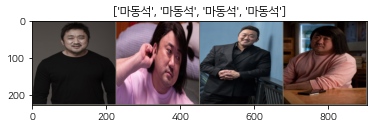

In [9]:
#이미지를 시각화할 때 사용할 함수를 정의합니다.
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [10]:
#학습할 CNN 딥러닝 모델 객체를 초기화합니다.
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [11]:
#학습을 진행합니다.
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))


#0 Loss: 0.9583 Acc: 52.6882% Time: 79.5286s
#1 Loss: 0.4893 Acc: 81.7204% Time: 157.3018s
#2 Loss: 0.2604 Acc: 89.2473% Time: 231.9861s
#3 Loss: 0.3287 Acc: 88.1720% Time: 301.4860s
#4 Loss: 0.1901 Acc: 91.3979% Time: 386.6412s
#5 Loss: 0.2801 Acc: 88.1720% Time: 474.0462s
#6 Loss: 0.2654 Acc: 91.3979% Time: 545.5510s
#7 Loss: 0.3108 Acc: 89.2473% Time: 614.3665s
#8 Loss: 0.1293 Acc: 96.7742% Time: 683.1733s
#9 Loss: 0.2531 Acc: 91.3979% Time: 751.8983s
#10 Loss: 0.1268 Acc: 96.7742% Time: 819.7407s
#11 Loss: 0.2126 Acc: 90.3226% Time: 889.7212s
#12 Loss: 0.2603 Acc: 91.3979% Time: 960.8470s
#13 Loss: 0.2738 Acc: 89.2473% Time: 1029.3554s
#14 Loss: 0.4212 Acc: 86.0215% Time: 1097.9120s
#15 Loss: 0.2596 Acc: 92.4731% Time: 1174.3161s
#16 Loss: 0.2728 Acc: 92.4731% Time: 1259.9352s
#17 Loss: 0.1722 Acc: 91.3979% Time: 1339.7584s
#18 Loss: 0.2386 Acc: 93.5484% Time: 1422.0573s
#19 Loss: 0.3449 Acc: 88.1720% Time: 1499.8978s
#20 Loss: 0.3666 Acc: 89.2473% Time: 1572.0406s
#21 Loss: 0.1270

[예측 결과: 김종국] (실제 정답: 김종국)


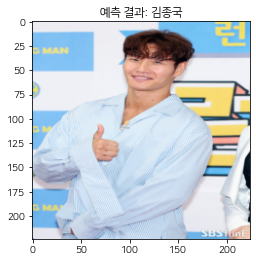

[예측 결과: 마동석] (실제 정답: 마동석)


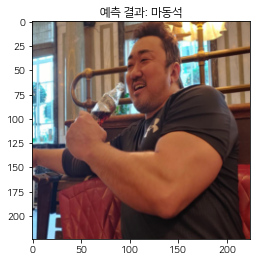

[예측 결과: 마동석] (실제 정답: 마동석)


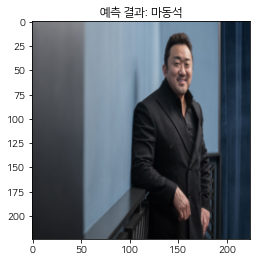

[예측 결과: 김종국] (실제 정답: 김종국)


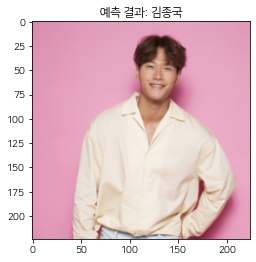

[예측 결과: 마동석] (실제 정답: 마동석)


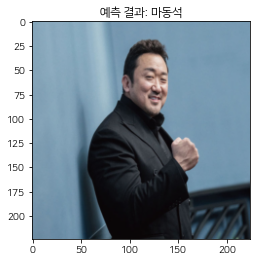

[예측 결과: 이병헌] (실제 정답: 이병헌)


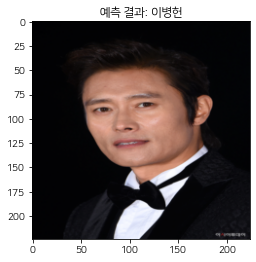

[예측 결과: 마동석] (실제 정답: 마동석)


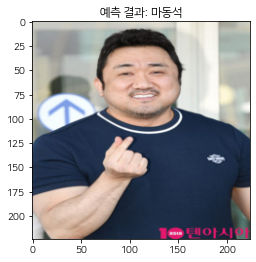

[예측 결과: 김종국] (실제 정답: 김종국)


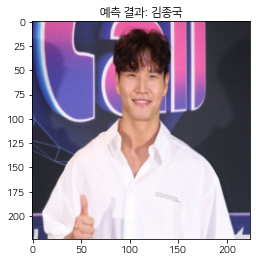

[Test Phase] Loss: 0.1618 Acc: 90.3226% Time: 37.9775s


In [12]:
#학습된 모델을 평가합니다.
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

# 3. 분류 모델 API 개발

--2022-03-30 23:45:42--  https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg
upload.wikimedia.org (upload.wikimedia.org) 해석 중... 103.102.166.240
다음으로 연결 중: upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 4070584 (3.9M) [image/jpeg]
저장 위치: `test_image.jpg'

test_image.jpg      100%[===================>]   3.88M  3.10MB/s    /  1.3s    

2022-03-30 23:45:44 (3.10 MB/s) - `test_image.jpg' 저장함 [4070584/4070584]



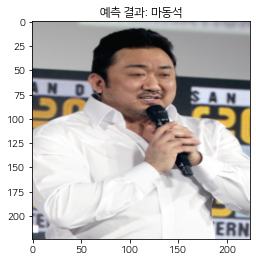

In [13]:
# 우선, 테스트용 이미지 받아온 후 분류 결과를 반환하는 기능 작성
!wget https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg -O test_image.jpg
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

In [ ]:
#웹 API 개방을 위해 Ngrok 서비스를 이용합니다.
#API 기능 제공을 위해 Flask 프레임워크를 사용합니다.
!pip install flask-ngrok
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})
    
run_with_ngrok(app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
Exception in thread Thread-6:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.8/threading.py", line 1254, in run
    self.function(*self.args, **self.kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/flask_ngrok.py", line 70, in start_ngrok
    ngrok_address = _run_ngrok()
  File "/opt/anaconda3/lib/python3.8/site-packages/flask_ngrok.py", line 31, in _run_ngrok
    ngrok = subprocess.Popen([executable, 'http', '5000'])
  File "/opt/anaconda3/lib/python3.8/subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/opt/anaconda3/lib/python3.8/subprocess.py", line 1702, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
PermissionError: [Errno 13] Permission denied: '/var/folders/7f/_68n2jfj1cd17628pwg8c2c40000gn/T/ngro